# SpchFig Testing

22/02/08: v0.6  
27/09/22: v0.7

### Do the imports and get your data ready

In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
%matplotlib inline
import os,sys 
import numpy as np
import pandas as pd
from IPython.display import display, Audio, HTML, clear_output

# optionally plotly as backend
# !! the plotly backend does not work at this point (22/09/2021)
#import plotly.io as pio
#os.environ['PYSPCH_BACKEND'] = "plotly"

#import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec 
#from matplotlib.figure import Figure 
#
import pyspch.sp as Sps
import pyspch.core as Spch
import pyspch.display as Spd
# load example file and compute spectrogram
name='https://homes.esat.kuleuven.be/~spchlab/data/misc/friendly'
wavdata, sr = Spch.load(name+".wav")
seggra = Spch.read_seg_file(name+ ".gra",fmt='float32')
shift=0.01
spgfreq = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift)
(nparam,nfr)=spgfreq.shape
d_freq = sr/(2.*(nparam-1))

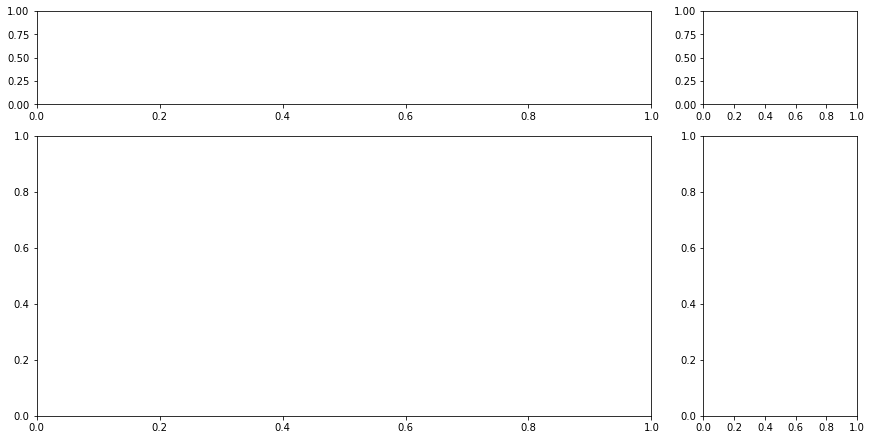

In [3]:
fig = Spd.SpchFig(row_heights=[1.,3.],col_widths=[4.,1.])
display(fig)

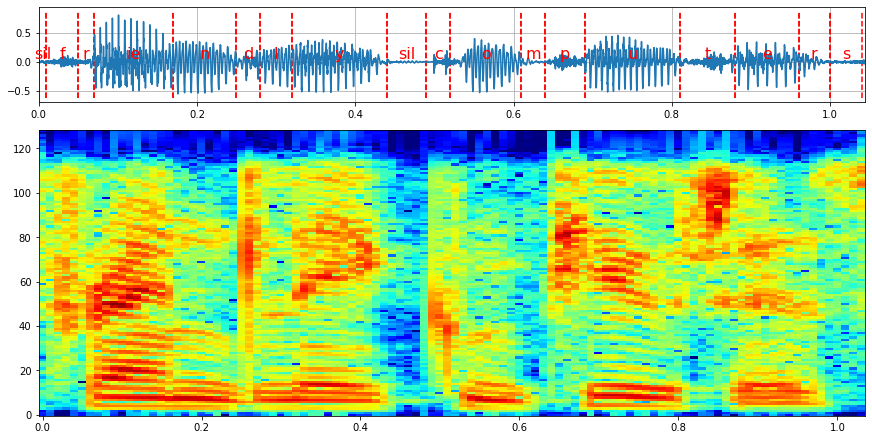

In [4]:
fig=Spd.SpchFig(row_heights=[1,3])
fig.add_line_plot(wavdata,iax=0,dx=1/sr)
fig.add_img_plot(spgfreq,iax=1,dx=.01)
fig.add_seg_plot(seggra,iax=0)
fig

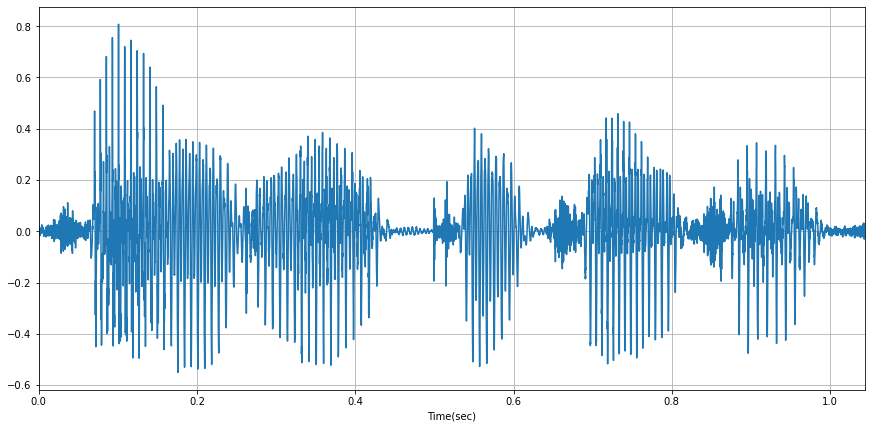

In [5]:
fig = Spd.PlotWaveform(wavdata)
fig

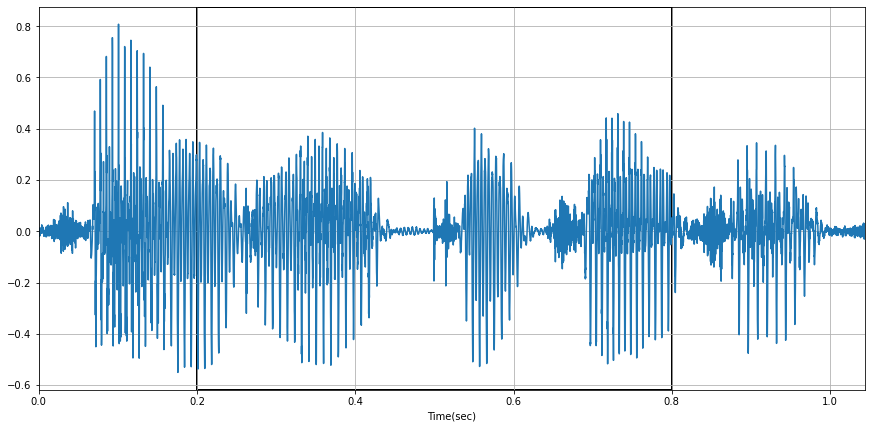

In [6]:
fig.add_vrect(.2,.8,color='r')
fig

### 1. Spectrogram 

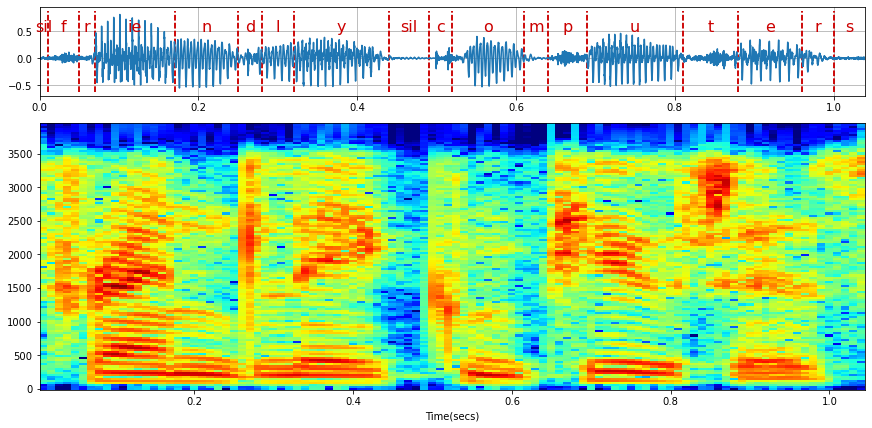

In [7]:
fig = Spd.PlotSpg(spgdata=spgfreq,wavdata=wavdata,sample_rate=sr,shift=shift,segwav=seggra)
fig

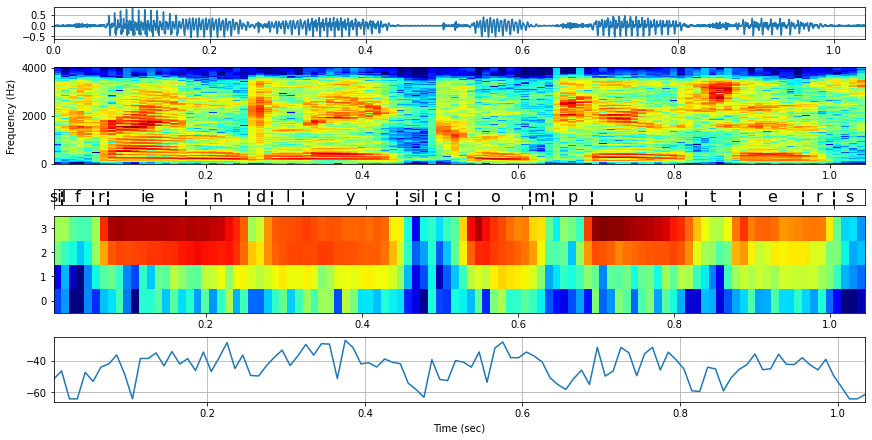

In [8]:
fig = Spd.PlotSpgFtrs(spgdata=spgfreq,wavdata=wavdata,sample_rate=sr,shift=shift,
                        segdata=[seggra],line_ftrs=[spgfreq[1,:]],img_ftrs=[spgfreq[1:5,:]])
fig

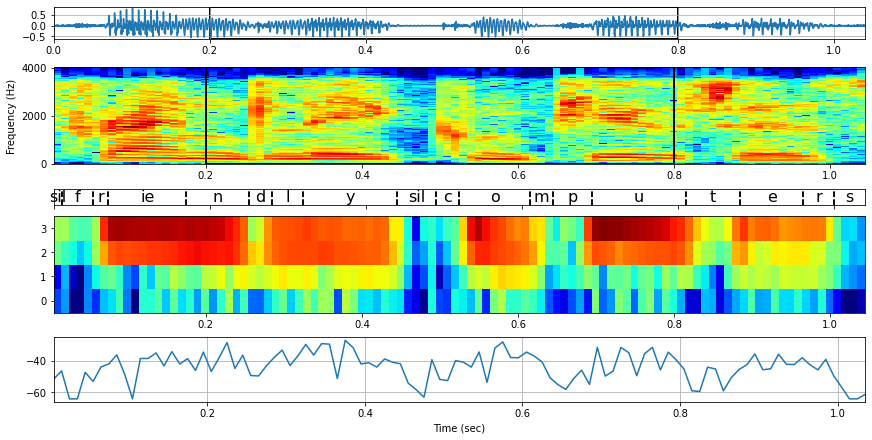

In [9]:
fig.add_vrect(.2,.8,iax=[1,0],color='r')
fig

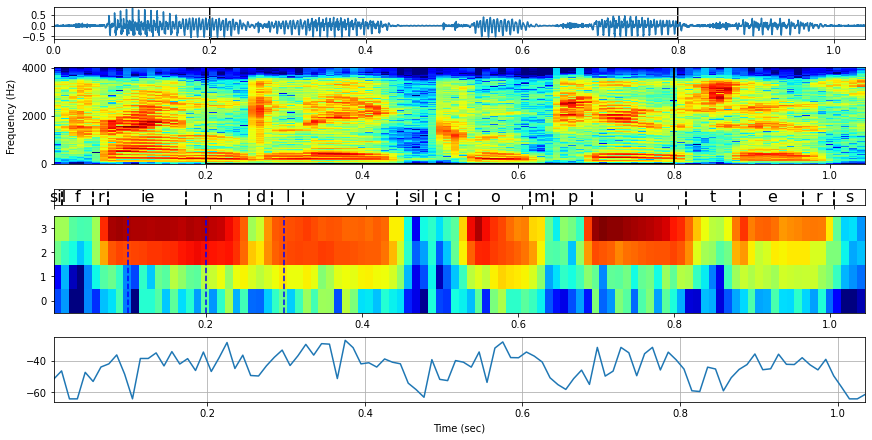

In [10]:
fig.add_vlines([.1,.2,.3],color='b',iax=3)
display(fig)

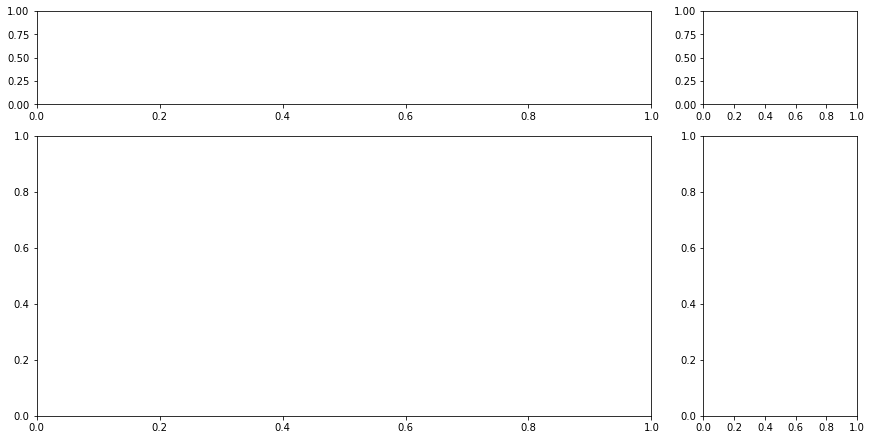

In [11]:
fig = Spd.SpchFig(row_heights=[1.,3.],col_widths=[4.,1.])
display(fig)

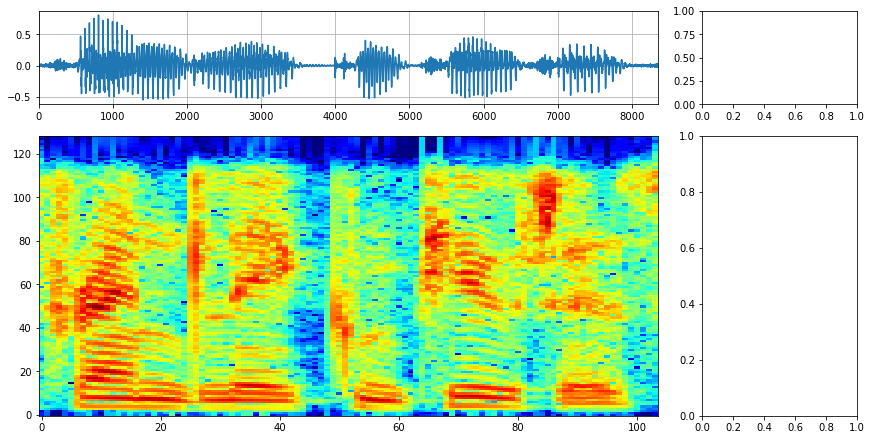

In [12]:
fig.add_line_plot(wavdata,iax=[0,0])
fig.add_img_plot(spgfreq,iax=[1,0])
fig

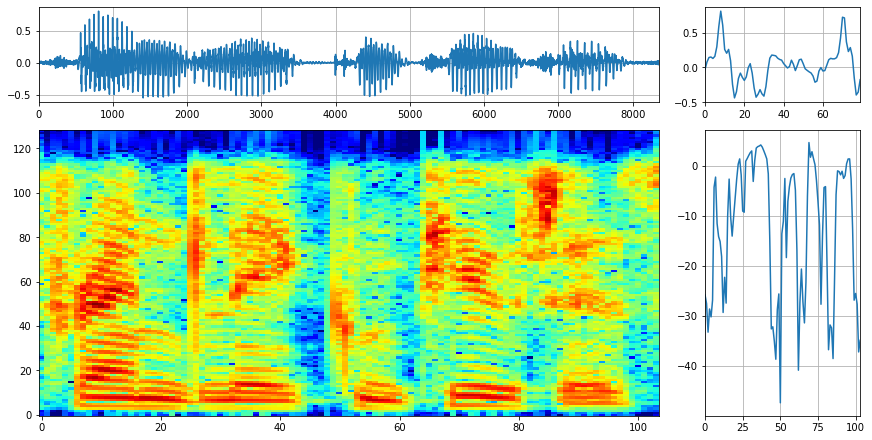

In [13]:
fig.add_line_plot(wavdata[800:880],iax=[0,1])
fig.add_line_plot(spgfreq[10,:],iax=[1,1])
fig